# Data Mining - Notebook 1
### Francisco Cunha, 76759
### João Amaral, 76460

# Task A: Pre-Processing

- [CSV's File Reading](#CSV's-File-Reading)
- [Mapping categorial data into numeric data (Car data set)](#Mapping-categorial-data-into-numeric-data-(Car-data-set))
- [Rank features](#Rank-features)
  - [Categorical data set (Car)](#Categorical-data-set-(Car))
  - [Numerical data set (White wine)](#Numerical-data-set-(White-wine))
- [Dimension reduction](#Dimension-reduction)
  - [Principal Component Analysis](#Principal-Component-Analysis)
    - [Prepare the data for a classification task](#Prepare-the-data-for-a-classification-task)
    - [Normalize Features](#Normalize-Features)
    - [Perform PCA (Car)](#Perform-PCA-(Car))
    - [Perform PCA (White wine)](#Perform-PCA-(White-wine))
    - [Dimension Reduction before classification](#Dimension-Reduction-before-classification)
  - [Kernel Principal Components](#Kernel-Principal-Components)

# Task B: Predictive Model

## CSV's File Reading

In [1]:
import os
import pandas as pd
from pandas import DataFrame

# gets current working directory
cwd = os.getcwd()

# splits cwd by Data_Mining/
dm = cwd.split('Data_Mining/')

# datasets path
datasets_path = dm[0] + "Data_Mining/Datasets/"

# Assign spreadsheet filename to 'car_path' and 'white_path'
car_path = (datasets_path + "car.csv") # https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
white_path = (datasets_path + "white_wine.csv") # https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Load CSV's
dataset_car = pd.read_csv(car_path) # categorical data set
dataset_white = pd.read_csv(white_path) # numerical data set
dataset_car.head() # shows only the first 5 instances on the data set

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
dataset_white.head() # shows only the first 5 instances on the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##  Mapping categorial data into numeric data (Car data set)

In [3]:
# https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe
# http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/

# put all category columns into a list and converts to numerical values according 1st link
# saves the columns name of dataset to a list
#columns_list = df_car.dtypes.index
# Converts dtype object to category
#for i in range(len(columns_list)):
    #df_car[columns_list[i]] = df_car[columns_list[i]].astype('category')

#cat_columns = df_car.select_dtypes(['category']).columns
#df_car[cat_columns] = df_car[cat_columns].apply(lambda x: x.cat.codes)

# converts dtype category to binary according 2nd link
Y_car = pd.get_dummies(dataset_car[['class values']])
Y_car.head() # shows only the first 5 instances on the data set

,class values_acc,class values_good,class values_unacc,class values_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [4]:
X_car = dataset_car.drop('class values', 1)  
X_car = pd.get_dummies(X_car)
X_car.head() # shows only the first 5 instances on the data set

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


## Rank features

### Categorical data set (Car)

In [5]:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/
from sklearn.feature_selection import SelectKBest, chi2
import numpy

# UNIVARIATE SELECTION -> Statistical tests can be used to select those features that have the strongest relationship with the output variable.

print("CAR SHAPE OLD: ", X_car.shape)

# feature extraction
test_car = SelectKBest(score_func = chi2, k = 3) # selects features using chi square and selects 3 of the best features
fit_car = test_car.fit(X_car, Y_car) # Run score function on (X, Y) and get the appropriate features.
indices_car = fit_car.get_support(indices='false') # Get a mask, or integer index, of the features selected
print("\nCAR INDICES: ", indices_car)

# new dataset
X_car_new = SelectKBest(chi2, k=3).fit_transform(X_car, Y_car)
print("\nCAR SHAPE NEW: ", X_car_new.shape)

# summarize scores 
numpy.set_printoptions(precision = 3) # sets precision to 3 numbers
print("\nCAR FIT SCORES: ", fit_car.scores_)

# Apply the transformation to the dataset
features_car = fit_car.transform(X_car)

# Summarize selected features
print("\nCAR Features: ", features_car[0:4,:])

uni_selection_car = chi2(X_car, Y_car) # MAYBE NOT NEEDED
print("\nCAR UNIVARIATE SELECTION: ", uni_selection_car) # MAYBE NOT NEEDED

CAR SHAPE OLD:  (1728, 21)

CAR INDICES:  [12 18 19]

CAR SHAPE NEW:  (1728, 3)

CAR FIT SCORES:  [  3.653e+01   8.682e+01   1.546e+01   5.043e+01   1.918e+01   5.787e+01
   1.546e+01   5.043e+01   6.867e+00   2.432e-01   1.637e+00   1.637e+00
   2.466e+02   6.952e+01   5.524e+01   2.065e+01   1.258e+00   3.137e+01
   1.735e+02   2.466e+02   5.924e+01]

CAR Features:  [[1 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 1]]

CAR UNIVARIATE SELECTION:  (array([  3.653e+01,   8.682e+01,   1.546e+01,   5.043e+01,   1.918e+01,
         5.787e+01,   1.546e+01,   5.043e+01,   6.867e+00,   2.432e-01,
         1.637e+00,   1.637e+00,   2.466e+02,   6.952e+01,   5.524e+01,
         2.065e+01,   1.258e+00,   3.137e+01,   1.735e+02,   2.466e+02,
         5.924e+01]), array([  5.790e-08,   1.054e-18,   1.462e-03,   6.471e-11,   2.508e-04,
         1.677e-12,   1.462e-03,   6.471e-11,   7.627e-02,   9.703e-01,
         6.509e-01,   6.509e-01,   3.584e-53,   5.418e-15,   6.117e-12,
         1.244e-04,   7.392e-01,   7.

### Numerical data set (White wine)

In [6]:
#Y_white = dataset_white['quality']
Y_white = pd.get_dummies(dataset_white[['quality']])
Y_white.head() # shows only the firts 5 instances on the data set

,quality
0,6
1,6
2,6
3,6
4,6


In [7]:
X_white = dataset_white.drop('quality', 1)
X_white.head() # shows only the first 5 instances on the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [8]:
print("WHITE SHAPE OLD: ", X_white.shape)

# feature extraction
test_white = SelectKBest(score_func = chi2, k = 6) # selects features using chi square and selects 6 of the best features
fit_white = test_white.fit(X_white, Y_white) # Run score function on (X, Y) and get the appropriate features.
indices_white = fit_white.get_support(indices='false') # Get a mask, or integer index, of the features selected
print("\nWHITE WINE INDICES: ", indices_white)

# new dataset
X_white_new = SelectKBest(chi2, k=6).fit_transform(X_white, Y_white)
print("\nWHITE SHAPE NEW: ", X_white_new.shape)

# summarize scores 
numpy.set_printoptions(precision = 3) # sets precision to 3 numbers
print("\nWHITE FIT SCORES: ", fit_white.scores_)

# Apply the transformation to the dataset
features_white = fit_white.transform(X_white)

# Summarize selected features
print("\nFeatures WHITE: ", features_white[0:4,:])

uni_selection_white = chi2(X_white, Y_white) # MAYBE NOT NEEDED
print("\nWHITE UNIVARIATE SELECTION: ", uni_selection_white) # MAYBE NOT NEEDED

WHITE SHAPE OLD:  (4898, 11)

WHITE WINE INDICES:  [ 0  1  3  5  6 10]

WHITE SHAPE NEW:  (4898, 6)

WHITE FIT SCORES:  [  7.922e+00   1.262e+01   8.511e-01   5.012e+02   2.529e+00   9.477e+02
   3.358e+03   5.065e-03   4.287e-01   5.792e-01   1.551e+02]

Features WHITE:  [[   7.      0.27   20.7    45.    170.      8.8 ]
 [   6.3     0.3     1.6    14.    132.      9.5 ]
 [   8.1     0.28    6.9    30.     97.     10.1 ]
 [   7.2     0.23    8.5    47.    186.      9.9 ]]

WHITE UNIVARIATE SELECTION:  (array([  7.922e+00,   1.262e+01,   8.511e-01,   5.012e+02,   2.529e+00,
         9.477e+02,   3.358e+03,   5.065e-03,   4.287e-01,   5.792e-01,
         1.551e+02]), array([  2.439e-001,   4.944e-002,   9.906e-001,   4.556e-105,
         8.652e-001,   1.815e-201,   0.000e+000,   1.000e+000,
         9.986e-001,   9.967e-001,   6.522e-031]))


### Principal Component Analysis

#### Prepare the data for a classification task

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set for both data sets
X_car_train, X_car_test, Y_car_train, Y_car_test = train_test_split(X_car, Y_car, test_size=0.3, random_state=0)
X_white_train, X_white_test, Y_white_train, Y_white_test = train_test_split(X_white, Y_white, test_size=0.3, random_state=0)

#### Normalize Features

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_car_train_std = sc.fit_transform(X_car_train)  
X_car_test_std = sc.transform(X_car_test) 
 
X_white_train_std = sc.fit_transform(X_white_train)  
X_white_test_std = sc.transform(X_white_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """


#### Perform PCA (Car)

In [11]:
from sklearn.decomposition import PCA
 
pca_car = PCA()  # Initialize the PCA class by passing the number of components to the constructor.
X_car_train_pca = pca_car.fit_transform(X_car_train_std)  
pca_car.explained_variance_ratio_ # variance caused by each of the principal components.

array([  7.653e-02,   7.418e-02,   7.285e-02,   7.178e-02,   7.019e-02,
         6.887e-02,   6.565e-02,   6.518e-02,   6.445e-02,   6.388e-02,
         6.263e-02,   6.256e-02,   6.117e-02,   6.056e-02,   5.952e-02,
         4.353e-31,   5.265e-32,   1.132e-32,   9.360e-33,   4.283e-33,
         2.263e-33])

#### Perform PCA (White wine)

In [12]:
pca_white = PCA()  # Initialize the PCA class by passing the number of components to the constructor. # empty all features
X_white_train_pca = pca_white.fit_transform(X_white_train_std)  
pca_white.explained_variance_ratio_ # variance caused by each of the principal components.

array([ 0.297,  0.142,  0.112,  0.095,  0.087,  0.084,  0.066,  0.054,
        0.037,  0.026,  0.001])

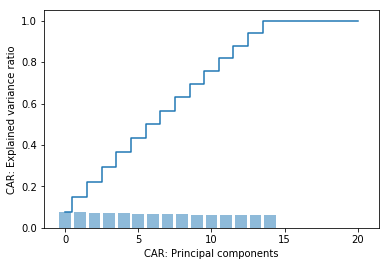

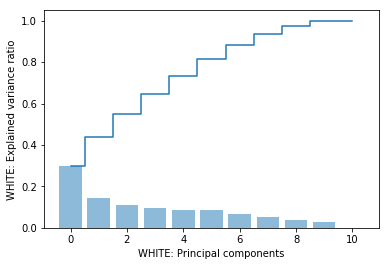

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt

# Here we can see that increasing the features more or less between 14/15 it tens to get more accuracy nearly to 100%
plt.bar(range(21), pca_car.explained_variance_ratio_, alpha=0.5, align='center')#, pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(21), numpy.cumsum(pca_car.explained_variance_ratio_), where='mid')
plt.ylabel('CAR: Explained variance ratio')
plt.xlabel('CAR: Principal components')
plt.show()

plt.bar(range(11), pca_white.explained_variance_ratio_, alpha=0.5, align='center')#, pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(11), numpy.cumsum(pca_white.explained_variance_ratio_), where='mid')
plt.ylabel('WHITE: Explained variance ratio')
plt.xlabel('WHITE: Principal components')
plt.show()

#### Dimension Reduction before classification

In [14]:
pca_car = PCA(n_components = 13) # for getting more or less of 94% of variance ratio = 13
X_car_train_pca = pca_car.fit_transform(X_car_train_std)
X_car_test_pca = pca_car.transform(X_car_test_std) # returns the specified number of principal components.
print("CAR: ", pca_car)

pca_white = PCA(n_components = 7) # for getting more or less of 93% of variance ratio = 7
X_white_train_pca = pca_white.fit_transform(X_white_train_std)
X_white_test_pca = pca_white.transform(X_white_test_std) # returns the specified number of principal components. 
print("\nWHITE: ", pca_white)

CAR:  PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

WHITE:  PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


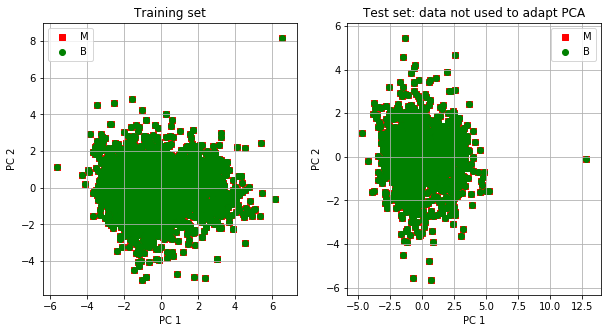

In [16]:
# WHITE WINE
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure
inx=(Y_white_train >= 1)
inx=inx.values.ravel()
ax.scatter(X_white_train_pca[inx,0], X_white_train_pca[inx,1],marker='s',color='r',label='M') 
inx=(Y_white_train <= 10)
inx=inx.values.ravel()
ax.scatter(X_white_train_pca[inx,0],X_white_train_pca[inx,1],marker='o',color='g',label='B')    
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure
inx=(Y_white_test >= 1)
inx=inx.values.ravel()
ax.scatter(X_white_test_pca[inx,0],X_white_test_pca[inx,1],marker='s',color='r',label='M')  
inx=(Y_white_test <= 10)
inx=inx.values.ravel()
ax.scatter(X_white_test_pca[inx,0],X_white_test_pca[inx,1],marker='o',color='g',label='B')
    
ax.set_title("Test set: data not used to adapt PCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Kernel Principal Components